# Machine learning intro

Polynomial regression using scikit-learn.

In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt

import sklearn.metrics
import sklearn.linear_model
from sklearn.preprocessing import PolynomialFeatures

The methods used here (and in future assignments) rely on random number generation. To make your results reproducible, don't forget to set your seed.

In [2]:
np.random.seed(42)

In [3]:
# Generate synthetic dataset


def f(x, noise_std=0.0):
  """Creates a degree three polynomial from the input."""

  y = beta_true[0] \
      + beta_true[1] * x \
      + beta_true[2] * x**2 \
      + beta_true[3] * x**3
  y += noise_std * np.random.randn(n, 1)
  return y

The polynomial regression is of form: $y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3$. 

Let's define our function with polynomial parameters:

In [4]:
beta_true = [0.1, 0.3142, 0.0618, -0.2718]  # True regression coefficients
print(beta_true)

[0.1, 0.3142, 0.0618, -0.2718]


Create training data

In [5]:
n = 100  # 100 data samples
X = np.random.rand(n, 1) * 20 - 10  # Generate independent variable
y = f(X, noise_std=20.0)  # Generate the outputs

Create validation data identically

In [6]:
X_val = np.random.rand(n, 1) * 20 - 10  # Validation data set
y_val = f(X_val, noise_std=20.0)  # Validation data output

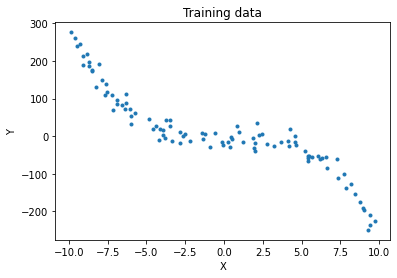

In [7]:
plt.figure()
plt.plot(X, y, '.')
plt.title('Training data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Let's transform $X$ to something more meaningful, that's easier to handle.

In [8]:
# Transform dataset using a polynomial of degree 3
# It will fit an intercept (the bias), and first through third order terms
poly = PolynomialFeatures(degree=3, include_bias=True)
poly.fit(X)
X_ = poly.transform(X)
X_val_ = poly.transform(X_val)

print(f"X_.shape    : {X_.shape}")
print(f"X_val_.shape: {X_val_.shape}")

X_.shape    : (100, 4)
X_val_.shape: (100, 4)


In [9]:
print("First element: " + str(X[0]) + " First element squared: " + str(X[0]**2) + " First element cubed: " + str(X[0]**3))
print("The features for the first element: " + str(X_[0, :]))

First element: [-2.50919762] First element squared: [6.29607271] First element cubed: [-15.79809068]
The features for the first element: [  1.          -2.50919762   6.29607271 -15.79809068]


The returned features are [$1, x, x^2, x^3$]. Now we can fit a linear regression model between these features and $Y$.

In [10]:
# Create model and fit it to the training data
model = sklearn.linear_model.LinearRegression(fit_intercept=True)
_ = model.fit(X_, y)  # Note that I'm using the X_ here, i.e. transformed data

In [11]:
# Use model to predict outputs
yhat = model.predict(X_)
yhat_val = model.predict(X_val_)
mse = sklearn.metrics.mean_squared_error(y, yhat)
mse_val = sklearn.metrics.mean_squared_error(y_val, yhat_val)
print(f"Training MSE error  : {mse:.3f}")
print(f"Validation MSE error: {mse_val:.3f}")

Training MSE error  : 308.986
Validation MSE error: 338.061


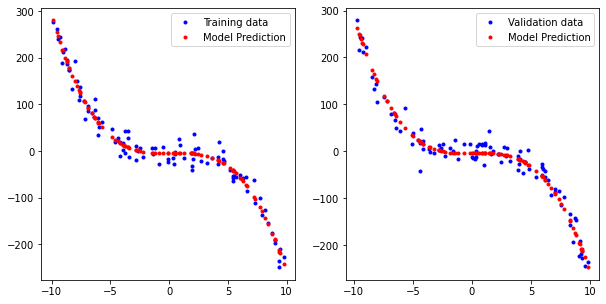

In [12]:
# Plot predictions
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(X, y, '.', color="blue")
plt.plot(X, yhat, '.', color="red")
plt.legend(["Training data", "Model Prediction"])
plt.subplot(122)
plt.plot(X_val, y_val, '.', color="blue")
plt.plot(X_val, yhat_val, '.', color="red")
plt.legend(["Validation data", "Model Prediction"])
plt.show()

In [13]:
# Regression coefficients
print(f"True coefficients : {beta_true}")
print(f"Model coefficients: {model.coef_[0].round(4).tolist()}")

True coefficients : [0.1, 0.3142, 0.0618, -0.2718]
Model coefficients: [0.0, 0.4684, 0.1753, -0.281]
